0it [00:00, ?it/s]/tmp/ipykernel_100192/3041404762.py:40: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype("float") / cm.sum(axis=1, keepdims=True)  # Normalize by rows


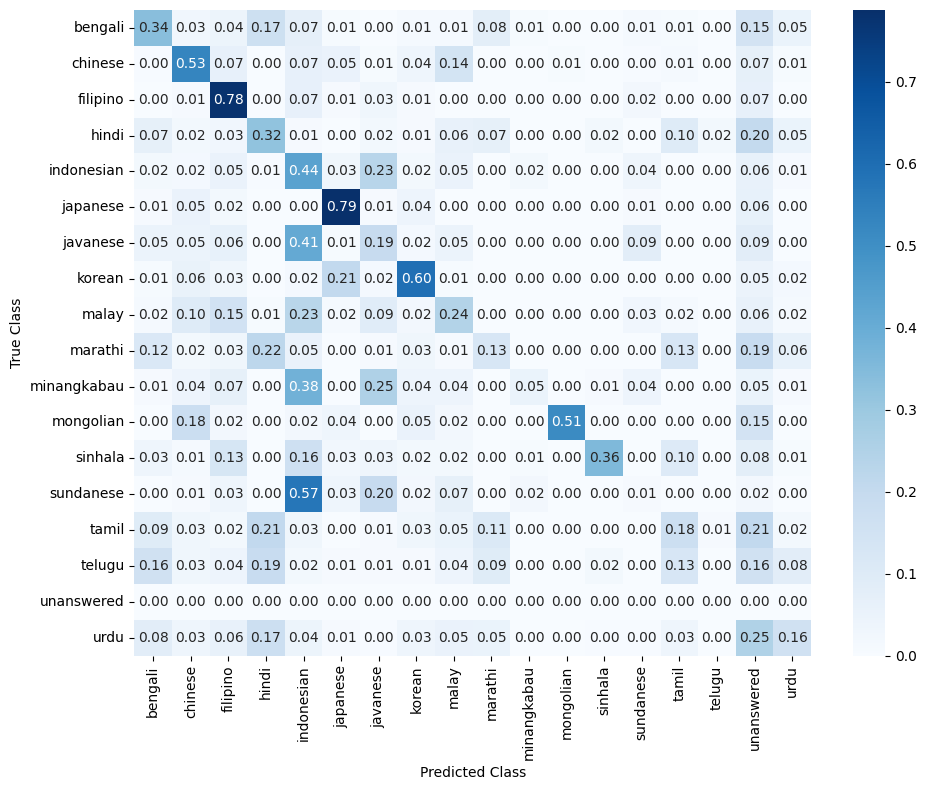

1it [00:02,  2.03s/it]/tmp/ipykernel_100192/3041404762.py:40: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype("float") / cm.sum(axis=1, keepdims=True)  # Normalize by rows


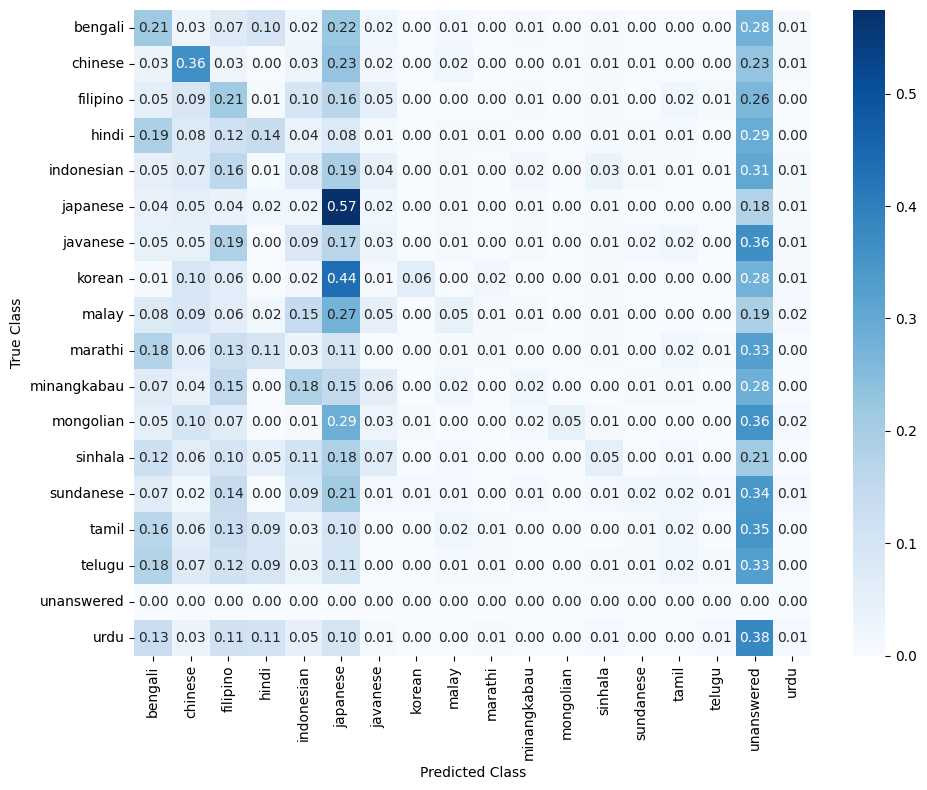

2it [00:03,  1.91s/it]/tmp/ipykernel_100192/3041404762.py:40: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype("float") / cm.sum(axis=1, keepdims=True)  # Normalize by rows


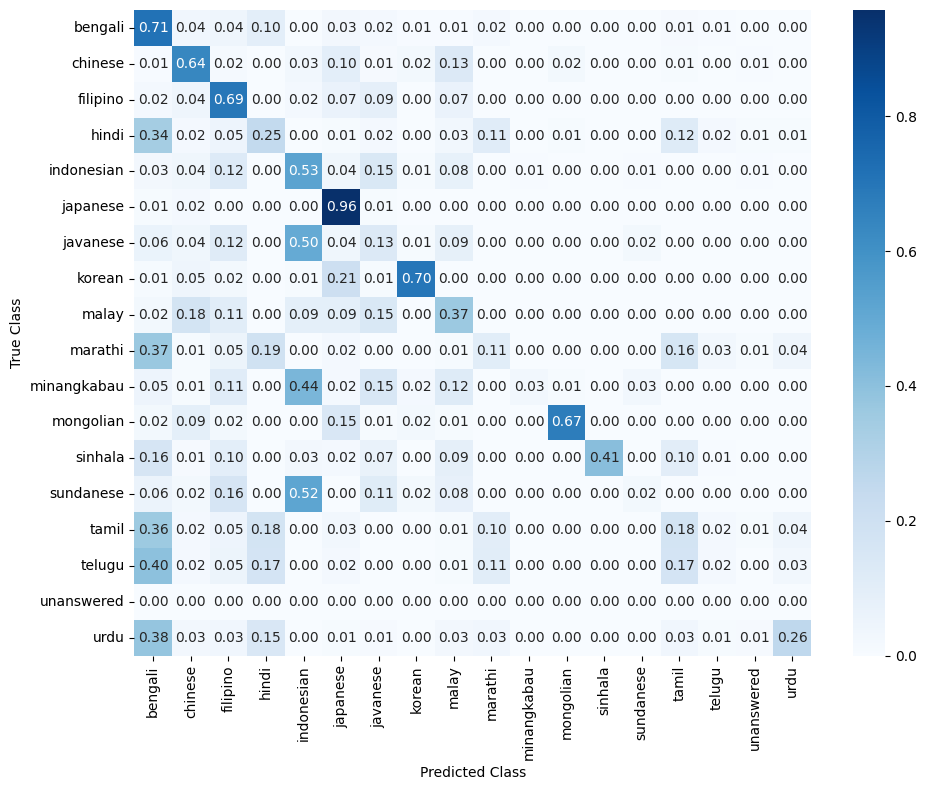

3it [00:05,  1.87s/it]/tmp/ipykernel_100192/3041404762.py:40: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype("float") / cm.sum(axis=1, keepdims=True)  # Normalize by rows


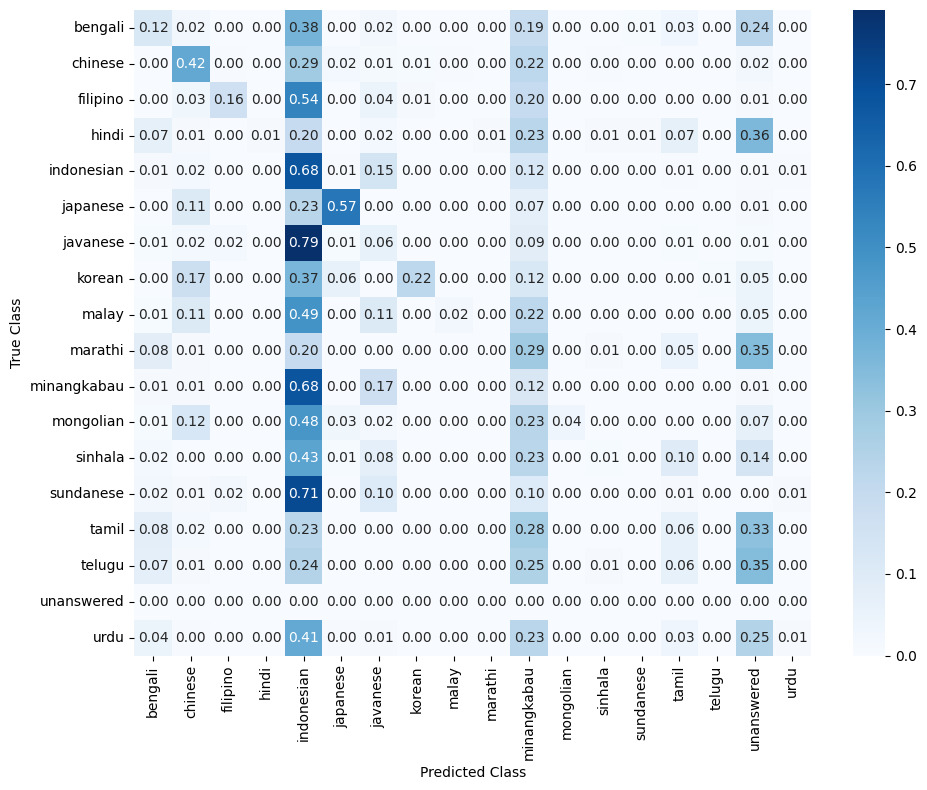

4it [00:07,  1.93s/it]


In [5]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import numpy as np


file_paths = [
    "llama_results.csv",
    "pixtral_results.csv",
    "qwen_results.csv",
    "llava_results.csv"
    ]


chart_names = [
    "Normalized Confusion Matrix for Llama-3.2-11B",
    "Normalized Confusion Matrix for Pixtral-12B",
    "Normalized Confusion Matrix for Qwen2-VL-7B",
    "Normalized Confusion Matrix for Llava-1.5-7B"
    ]


def plot_confusion_matrix(df, file_path, chart_name, true_col="Culture", pred_col="cleaned_output"):
    # Convert the true column to lowercase
    df[true_col] = df[true_col].str.lower()

    # Get unique classes from both true and predicted columns
    true_labels = df[true_col].unique()
    pred_labels = df[pred_col].unique()
    
    # Combine both to ensure all classes (including "unanswered") are included
    all_labels = sorted(set(true_labels).union(set(pred_labels)))

    # Generate the confusion matrix
    cm = confusion_matrix(df[true_col], df[pred_col], labels=all_labels)
    cm_normalized = cm.astype("float") / cm.sum(axis=1, keepdims=True)  # Normalize by rows

    # Replace NaN values caused by division by zero with 0
    cm_normalized = np.nan_to_num(cm_normalized)

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm_normalized, annot=True, fmt=".2f", cmap="Blues", 
        xticklabels=all_labels, yticklabels=all_labels
    )
    # plt.title(chart_name)
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.tight_layout()
    plt.savefig(f"results//charts//{chart_name}.png", dpi=300, bbox_inches="tight")  # Save as PNG with high resolution
    plt.show()
    # Save the heatmap as an image file


# Example application
# plot_confusion_matrix(df, "example.csv")



for index, file_path in tqdm(enumerate(file_paths)):
    df0 = pd.read_csv("results//processed_csvs//" + file_path)
    # Apply to example data
    # plot_normalized_bar_chart(df0)
    chart_name = chart_names[index]
    plot_confusion_matrix(df0, file_path, chart_name)
    # break